in [`gmx editconf`](https://manual.gromacs.org/current/onlinehelp/gmx-editconf.html) command<br>
`-d` arg determined the Distance between the solute and the box<br>
we want fix the system atom number by adjust the `-d` value<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
pdbid = "1kf1_EWV"

In [3]:
def get_n_sol(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron > /dev/null 2>&1
    !gmx solvate -cp {pdbid}_dode.pdb -cs spc216.gro -o {pdbid}_solv.pdb -p topol.top > /dev/null 2>&1
    sol = !grep "SOL" topol.top
    n_sol = int(sol[0].split()[1])
    return n_sol

In [4]:
def get_box(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron >editconf.txt 2>&1
    volume = !grep "new box volume" editconf.txt
    volume = float(volume[0].split()[4])
    return volume

In [5]:
def get_n_atoms(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron > /dev/null 2>&1
    !gmx solvate -cp {pdbid}_dode.pdb -cs spc216.gro -o {pdbid}_solv.pdb -p topol.top >solvate.txt 2>&1
    atoms = !grep "Solvent box contains" solvate.txt
    n_atoms = int(atoms[0].split()[3])
    return n_atoms

In [6]:
!pwd

/home/user/workfolder/g4dna_protocol/propeller_ewv/c.gromacs.run_md/1.create_system


### Plot d v.s. Volume (linear)

In [24]:
!rm \#topol.top* \#{pdbid}*
d2volume = {}
for d in tqdm(np.linspace(0.720, 0.740, 51)):
    volume = get_box(d)
    d2volume[np.round(d, decimals=15)] = volume

rm: cannot remove '#1kf1_EWV*': No such file or directory


100%|███████████████████████████████████████████| 51/51 [00:26<00:00,  1.90it/s]


Text(0, 0.5, 'volume')

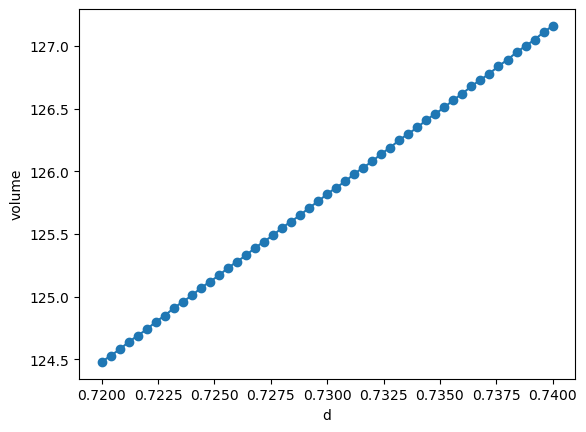

In [25]:
plt.plot(d2volume.keys(), d2volume.values())
plt.scatter(d2volume.keys(), d2volume.values())
plt.xlabel('d')
plt.ylabel('volume')

### Plot d v.s. n_sol (non-linear)
in wtTel22, we want fix n_sol = **3839**

In [14]:
!rm \#topol.top* \#{pdbid}*
d2n_sol = {}
for d in tqdm(np.linspace(0.725, 0.733, 51)):
    n_sol = get_n_sol(d)
    d2n_sol[np.round(d, decimals=15)] = n_sol

100%|███████████████████████████████████████████| 51/51 [00:43<00:00,  1.17it/s]


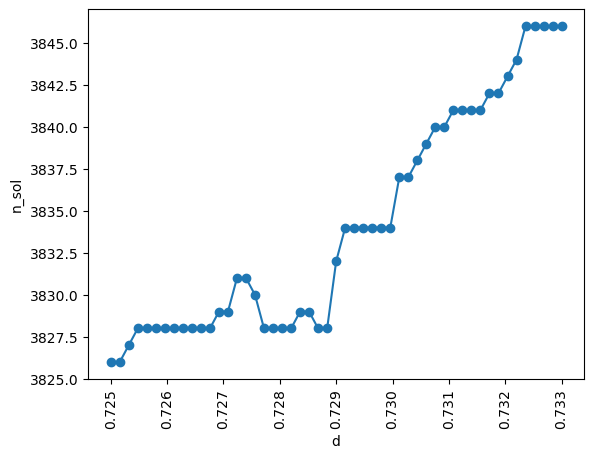

In [15]:
plt.plot(d2n_sol.keys(), d2n_sol.values())
plt.scatter(d2n_sol.keys(), d2n_sol.values())
plt.xlabel('d')
plt.ylabel('n_sol')
plt.xticks(rotation=90)
plt.show()

In [16]:
d2n_sol

{0.725: 3826,
 0.72516: 3826,
 0.72532: 3827,
 0.72548: 3828,
 0.72564: 3828,
 0.7258: 3828,
 0.72596: 3828,
 0.72612: 3828,
 0.72628: 3828,
 0.72644: 3828,
 0.7266: 3828,
 0.72676: 3828,
 0.72692: 3829,
 0.72708: 3829,
 0.72724: 3831,
 0.7274: 3831,
 0.72756: 3830,
 0.72772: 3828,
 0.72788: 3828,
 0.72804: 3828,
 0.7282: 3828,
 0.72836: 3829,
 0.72852: 3829,
 0.72868: 3828,
 0.72884: 3828,
 0.729: 3832,
 0.72916: 3834,
 0.72932: 3834,
 0.72948: 3834,
 0.72964: 3834,
 0.7298: 3834,
 0.72996: 3834,
 0.73012: 3837,
 0.73028: 3837,
 0.73044: 3838,
 0.7306: 3839,
 0.73076: 3840,
 0.73092: 3840,
 0.73108: 3841,
 0.73124: 3841,
 0.7314: 3841,
 0.73156: 3841,
 0.73172: 3842,
 0.73188: 3842,
 0.73204: 3843,
 0.7322: 3844,
 0.73236: 3846,
 0.73252: 3846,
 0.73268: 3846,
 0.73284: 3846,
 0.733: 3846}